0.9555555555555556


GaussianNB(priors=None, var_smoothing=1e-09)

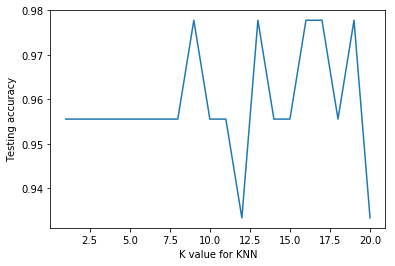

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 15 08:10:02 2019

@author: soknu
"""
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.datasets import load_iris

iris = load_iris()

x = iris.data
y = iris.target

iris_data = DataFrame(x, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
iris_target = DataFrame(y, columns = ['Species'])

iris_target.tail()


def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'Virginica'
    
    
iris_target['Species'] = iris_target['Species'].apply(flower)
iris_target.head()

iris = pd.concat([iris_data, iris_target], axis = 1)
iris.head()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors = 6)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

from sklearn import metrics

print(metrics.accuracy_score(y_test,y_pred))

k_range = range(1,21)

accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, accuracy)
plt.xlabel('K value for KNN')
plt.ylabel('Testing accuracy')

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train, y_train)
